Grid world size is 5**5
Agent starts at (0,0)
Goal state is (4,4)
Reward upon reaching goal state is 100, reward is -20 for obstacle and 1 for remaining state.
Number of episodes = 600
Discount factor (gamma) = 0.9, learning rate = 0.4, epsilon greedy policy = *0.2*

In [31]:
import numpy as np

# Constants
GRID_SIZE = 5
NUM_ACTIONS = 4
NUM_EPISODES = 600
ALPHA = 0.4  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.2  # Exploration-exploitation trade-off

# Define grid layout
start = (0, 0)  # Start point
goal = (GRID_SIZE - 1, GRID_SIZE - 1)  # Goal point
obstacles = [(1, 2), (2, 3), (3, 1)]  # Obstacle positions

# Initialize Q-table
q_table = np.zeros((GRID_SIZE, GRID_SIZE, NUM_ACTIONS))

# Helper function to get available actions for a given state
def get_available_actions(state):
    row, col = state
    available_actions = []
    if row > 0:
        available_actions.append(0)  # UP
    if row < GRID_SIZE - 1:
        available_actions.append(1)  # DOWN
    if col > 0:
        available_actions.append(2)  # LEFT
    if col < GRID_SIZE - 1:
        available_actions.append(3)  # RIGHT
    return available_actions

# Q-Learning Algorithm
total_steps = []  # List to store the number of steps taken in each episode
sum_square_error = []  # List to store the sum of square errors in each episode

for episode in range(NUM_EPISODES):
    state = start  # Starting state
    episode_steps = 0  # Number of steps taken in this episode
    episode_error = 0  # Sum of square errors in this episode
    while state != goal:  # Continue until the goal state is reached
        # Choose an action using epsilon-greedy policy
        available_actions = get_available_actions(state)
        if np.random.uniform(0, 1) < EPSILON:
            action = np.random.choice(available_actions)  # Exploration
        else:
            action = np.argmax(q_table[state[0], state[1], :])  # Exploitation

        # Perform the action and observe the next state and reward
        if action == 0:  # UP
            new_state = (max(state[0] - 1, 0), state[1])
        elif action == 1:  # DOWN
            new_state = (min(state[0] + 1, GRID_SIZE - 1), state[1])
        elif action == 2:  # LEFT
            new_state = (state[0], max(state[1] - 1, 0))
        elif action == 3:  # RIGHT
            new_state = (state[0], min(state[1] + 1, GRID_SIZE - 1))

        # Check if the new state is an obstacle
        if new_state in obstacles:
            reward = -20  # Obstacle: -20 reward
        elif new_state == goal:
            reward = 100  # Goal state: 100 reward
        else:
            reward = 1  # Other states: 1 reward

        # Calculate the current and next state's Q-values
        current_q_value = q_table[state[0], state[1], action]
        max_q_value_in_new_state = np.max(q_table[new_state[0], new_state[1], :])

        # Calculate the error for this step
        error = reward + GAMMA * max_q_value_in_new_state - current_q_value
        episode_error += error ** 2

        # Update Q-value using the specified formula
        q_table[state[0], state[1], action] = (1 - ALPHA) * current_q_value + ALPHA * (reward + GAMMA * max_q_value_in_new_state)

        state = new_state  # Update the current state
        episode_steps += 1  # Increment step count for this episode

    total_steps.append(episode_steps)  # Store the number of steps taken in this episode
    sum_square_error.append(episode_error)  # Store the sum of square errors for this episode

    if episode >= 100 and episode < 500 and episode % 100 == 0:
        print(f"Q-table after {episode} episodes:")
        print(q_table)
# Print the learned Q-values
print("Learned Q-values:")
print(q_table)



Q-table after 100 episodes:
[[[  0.          31.88546815   0.          36.036721  ]
  [  2.78610421  38.92969     33.03946355  33.11562639]
  [  0.          30.61438713  36.03652089  24.18108218]
  [ 10.          10.          33.09356288  10.95028786]
  [  9.80137296  10.04752346  19.81613916   0.        ]]

 [[ 33.36773984  11.40144913   0.          38.11958288]
  [ 26.66350144  32.77173301  31.98509549  42.1441    ]
  [ 32.98100582  69.049       34.17859874  18.00613958]
  [ 26.80998377 -11.           2.08757533  10.        ]
  [ 11.02949362  10.          10.           0.        ]]

 [[ 24.27752887   9.99981688   0.           9.99999867]
  [ 38.74383993   8.8119793    9.9999934   33.61959952]
  [ 37.93971723  75.61        32.98581449  38.95597128]
  [ 10.          80.83721896   7.56146011   8.00686303]
  [ 10.           9.9846983  -10.96009233   0.        ]]

 [[ 13.52848379   0.           0.          -7.04001816]
  [  9.13389263   6.91768206   8.02314366  71.05048022]
  [ 58.2009053

*Intermediate* Q table are shown in the output.
Learned Q table is the updated Q table after completing episodes. Each row represents each state i.e., (0,0) and action pair value in four directions.

####  Graphs #####
Step-to-go curve and Sum of squared error are plotted below.
Number of steps taken in each episode to reach the goal represents the Step to
go curve.

Step to go curve :
At early stage of episode, agent took more steps to reach the goal, later on it reduced.
Error has been reduced as episodes increases, which indicates agent learned to reach the goal with maximum reward.

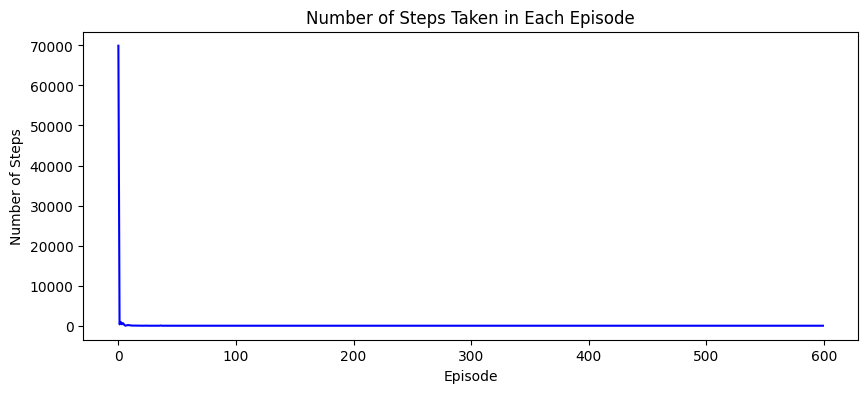

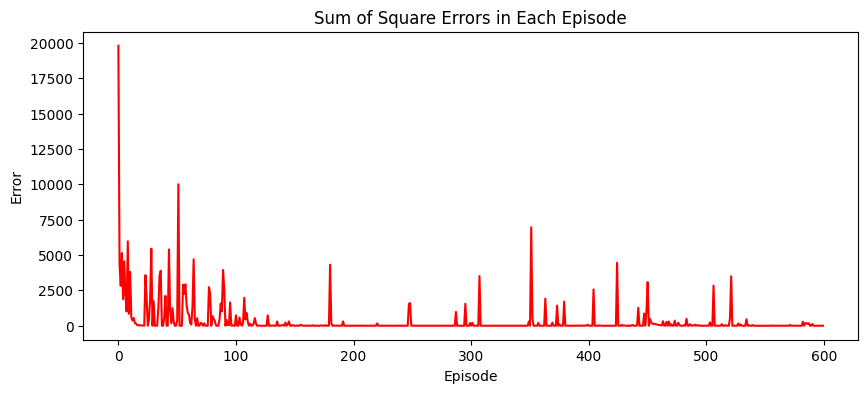

In [33]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting total steps
plt.figure(figsize=(10, 4))
plt.plot(total_steps, color='b', label='Total Steps')
plt.xlabel('Episode')
plt.ylabel('Number of Steps')
plt.title('Number of Steps Taken in Each Episode')
plt.show()

# Plotting sum of square errors
plt.figure(figsize=(10, 4))
plt.plot(sum_square_error, color='r', label='Sum of Square Errors')
plt.xlabel('Episode')
plt.ylabel('Error')
plt.title('Sum of Square Errors in Each Episode')
plt.show()
